# <span style="color: red;">Analysis Report</span>
## Ash S. Copeland (Holloway)
### <span style="color: red;">11/21/2024</span>

<span style="color: red;">Welcome to the Analysis Report! This port will contain a great deal of red-text within markdown cells. Red text will be utilized to show and explain changes in the document following the feedback I got from the first time around! This is in compliance with option 1 of the Analysis Report.</span>

My Hypothesis that is testable with the Spotify API is Tracks artists release in summer gain more traction and are more likely to become a “greatest hit” song than in winter.

The theoretical applications are that you would be able to better the chances of a song becoming a "greatest hit". <span style="color: red;">I believe this version of the report will go deeper into the variables as requested within the feedback from the API report. Specifically, I will be utilizing date and season options within pandas for data in order to convert a column's information, then create a graph based around them and finally be able to perform a regression on those values to see how strong the correlation may be! That explains the variables of how I will compare seasons a bit more. For what I will consider as greatest hits, that is easy! All the songs from this artist are from their "Greatest Hits" release albumn. I thought Queen would be a great option since they discontinued music after the Death of Freddy Mercury, and were able to truly appreciate their work thanks to its end, and therefore organize what truly were their greatest hits of all time now and future into an albumn since they will not make any more music! Of course this approach is also partially influenced by the scope of this project. Since this project was primarily designated to show we are able to perform what we learned in class, it has a bit more focus on the process rather than the result. So the decision of Queen would likely be too small scale for a real analysis. Nevertheless, it served its purpose here!</span>.

**Spotify Endpoints:** I used the Get Album Tracks and Get Several Tracks Endpoints.

**Why endpoints are suitable to test hypthesis:** These Endpoints allowed me to take the greatest Hits albumn from Queen, extract the songs and their Track ID's, and use those ID's to get the release dates of the songs to compare against one another. 

**Ways data is reliable and unreliable?**
In this report, I used Queen due to the legth of their active music career for a good pull of data. The long time between greatest hit releases and wide array of data makes this test reliable, yet the data is only for one artist and genre, which makes it questionable.

**Limitations or caveats to response that limit hypothesis?**
There certainly are limitations. Considering this pull was done from a single artist for the sake of simplificty for this project, the data's results are rather limited. In an actual test, it would be better to pull from multiple years of greatest hits accross multiple genres and analyze the trends between them.

**For this Report, we begin as we always do, with the imports. Some of these tools are not as necessary, but included them just in case.**

In [1]:
import urllib
import requests
import pandas as pd
import json
import base64

import statsmodels.api as sm
import matplotlib.pyplot as plt

<span style="color: red;">Added some new packages in here for later!</span> Now that we have imported all teh packages we will need, I next defined the functions that would be utilized in this API Call. Please see the comments within this cell for organization of each function.

In [2]:
#Definition of all Functions

#Function to formulate access
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    urldata = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    urlheader = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = urldata, headers = urlheader)
    print(response.status_code)
    return response.json()['access_token']
    
#Funtion to Make API Calls
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

Once the functions are created, it is time to define our variables. In order to simplify this Report, I have condensed all variables into one cell. This is how I standardly organize my work. I will break it down in order here: 

**Access Keys:**
This utilizes an external file to pull the my Spotify *Client ID* and *Client Secret*. It then uses that key to run the session tokens function from above in order to get our access token for the API Call and get ready to pull some data!

**API Session Variables:**
Next we use the access token we recieved in order to create a session header, which is one part of our API Call. Success can be seen from the 200 status codes listed below the variables!

**IDs:**
This section happens in two parts. The Album part, and Track part. Split between our two endpoints, GAT and GST. Since we do not have the track IDs yet, as they come from the GAT response, we will focus on the Album section. This will utilize an artist album ID we recieve from the Greatest Hits Album on spotify.

**Enpoints:**
This is where we list and organize our enpoints. The Endpoints come from the Spotify Web API Documentation. They were then formated using the variables that store the respective track and album ids for reach endpoint, even though we did not have the track ids at this time. 

**Responses:**
Here we go! Our API Calls! we now use the API Call function created in order to pull our data from spotify.

**DataFrames:**
After recieving the raw data, it is placed in the respective raw dataframe to be reorganized later. However, this dataframe was displayed and all Spotify Track IDs were pulled through copy and paste and placed in the track ids in the id area above! then the second API Call was made above, pulled into a raw dataframe, and then normalized using the normalize process I have personal experience with from previous positions of employment and feelance work. 

In [3]:
#Definition of all Variables

#Access Keys
keys = pd.read_csv("Spot_WebAPI_ClientID.txt") #Reading from an External File for Security Purposes
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0]) #runs the session function below

#API Session Variables
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

#IDs
artist_album_ID = '6a8nlV9V8kPUbTTCJNVSsh'
track_IDs = '6l8GvAyoUZwWDgF1e4822w,5Lsg8jlCoTyxRch9LvJo3E,7GqWnsKhMtEW0nzki5o0d8,0NZ90au4uU11IkvReTOGYJ,3lUx27TOwV2nAiKwnYYXxe,4OKf7CcYuw5H2HptkcKxcP,0DrDcqWpokMlhKYJSwoT4B,1jq8WXj8zBaNhcq3S4yadE,6aU0F03DR257LCPAXjtg42,1vfyi0Du06IjkakfSdXqGm,0P7YJ9fxIOM0Rq4pZ2qU42,1N8UEhbh2LXPvIymWwjmi6,4b0mX1GtrQLiUW9jpb6Xcx,6tYYT8zNxkadSCujCdR6Ur,1e9Tt3nKBwRbuaU79kN3dn,3bCjss1Y0kPPaSgd9cb89K,6ceLJHWkvMM3oc0Ftodrdm'

#Endpoints: Get Album Tracks (GAT), Get Several Tracks (GST)
End_GAT = 'https://api.spotify.com/v1/albums/{}/tracks' 
End_GST = 'https://api.spotify.com/v1/tracks?ids={}'
End_GAT_Final = End_GAT.format(artist_album_ID)
End_GST_Final = End_GST.format(track_IDs)

#Responses
GAT_response = api_call(End_GAT_Final, session_header)
GST_response = api_call(End_GST_Final, session_header)

#DataFrames
GAT_df_raw = pd.DataFrame(GAT_response['items'])
GST_df_raw = pd.DataFrame(GST_response['tracks'])
GST_df_raw_norm = pd.json_normalize(GST_response['tracks'])

200
200
200


With all that done its Tidy time! I simply dropped all the columns irrelevant to the search, or that were duplicates of each other so that I could compine them. I also added a column with teh Artist's name. <span style="color: red;">As highlighted in the feedback, I did manually copy and paste the track IDs! Although I could have programmed the IDs in to pull from the listed responses accross dataframes and then combine into the listed text for this variable, it seemed a bit overkill when the copy and paste button served a similar purpose. This moment did provide a limitation however, as it is a moment I deviated from the input of solely code and included my own input. That can be seen as a weak point in analysis. Truthfully, I cannot seem to find exactly where we pulled that text in the class examples and for the sake of time, I am leaving it as is. Although I do see the holes in the analysis because of this action and the consequences on its validity they would face.</span>

In [4]:
#Tidy GAT Response Dataframe
GAT_df_final = GAT_df_raw.drop(columns = ['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'track_number', 'type', 'uri', 'is_local'])
#Tidy GST Response Dataframe
GST_df_final = GST_df_raw_norm.drop(columns = ['track_number', 'type', 'uri', 'artists', 'album.album_type', 'album.artists', 'album.available_markets', 'album.href', 'album.uri', 'album.external_urls.spotify', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'href', 'id', 'is_local', 'name', 'popularity', 'album.id', 'album.images', 'album.name', 'album.release_date_precision', 'album.total_tracks', 'album.type', 'external_ids.isrc', 'external_urls.spotify'])
GST_df_final['artist'] = 'Queen'

Next up I merged the dataframes using concat in order to place them together on the horizontal axis! I also renamed the final columns in order to make them more readable!

In [5]:
#Merge Frames on ID
final_df = pd.concat([GAT_df_final, GST_df_final], axis=1)
final_df.rename(columns={'name': 'Song'}, inplace=True)
final_df.rename(columns={'album.release_date': 'Release Date'}, inplace=True)
final_df.rename(columns={'id': 'Spotify Track ID'}, inplace=True)
final_df.rename(columns={'artist': 'Artist'}, inplace=True)
final_df['Song'] = final_df['Song'].str.replace('Remastered 2011', '', regex=False)

And thats it! all that is left is to display the final dataframe!

In [6]:
final_df

,Spotify Track ID,Song,preview_url,preview_url,Release Date,Artist
0,6ljkRMigoNtu0x1mlTEsKc,Bohemian Rhapsody -,None,None,2006-01-01,Queen
1,6hfNDGNTJBR029RmV63IoO,Another One Bites The Dust -,None,None,2006-01-01,Queen
2,6Oj0XnWrDEl3KrwZuMQqVj,Killer Queen -,None,None,1974-11-08,Queen
3,52ZQTzXbbWjS4kjOcV3z5b,Fat Bottomed Girls - Single Version /,None,None,2006-01-01,Queen
4,6I55r9WyH1wV1whBRacLFa,Bicycle Race -,None,None,1978-11-10,Queen
5,6CVzXxIHDIDdyzlgfEWSZr,You're My Best Friend -,None,None,1975-11-21,Queen
6,064C5ivM2FUsY0ghkyt4YK,Don't Stop Me Now -,None,None,2020-08-10,Queen
7,5V890judRbpVT6X5AEYZc8,Save Me -,None,None,2019-07-26,Queen
8,0q8IUBbw0iedjCbzs7vT6U,Crazy Little Thing Called Love -,None,None,2006-01-01,Queen
9,4RJdwSqHapVcW5DaRtTkv0,Somebody To Love -,None,None,2004,Queen


After viewing the data above, with the exception of item 9 that only had a listed release year, we can see a clear pattern! Only 3 of the 16 songs were released in the summer time! And 11 were released during the winter months. This disproves my hypothesis! It appears Queen recieved more greatest hits in the winter than the summer! As stated above, this analysis is limited due to it only being a pull from one artist. I believe the alternate approach stated in the begin would still provide a better outcome. Next steps would be to work on a deeper analysis of this data from a greater and wider pull in order to confirm the new hypothesis of winter months pringing more greatest hits! and then we begin the process again!

<span style="color: red;">As highlighted in the response from the API report, it is important to highlight that these are not the origional releases! In an actual analysis, We would be utilizing much more data. Specifically, a random pull from random artists across genres and global locations to analye their songs and release dates in order to have enough data to make some sort of claim. For the scope of this class project, this is certainly very simplified with such a small dataset that it is likely unable to give us any real information. Nonetheless, up until this point it was primarily for the process rather than the destination, since grading is more based on "can we do what we learned" rather than "can we make a revolutionary discovery with real implications". That was more or less my thought process. </span>

## <span style="color: red;">From this point forward, this work will be unique to the Analysis Report</span>

<span style="color: red;">Red text will now go away since there are no more revisions and only additions. </span>First thing we need to do is organize the data into a more useful organization! This includes changing our 'Release Date' Column to reflect Seasons rather than specific dates. This can be done by changing the values to be DateTime and then adding the season to a new column! However, for this code to work, we need to remove ambiguous cells such as the "Somebody to Love" cell only having a year. That row will be pulled.

In [7]:
def get_season(date):
    if pd.Timestamp(date).month in [3, 4, 5]:
        return 'Spring'
    elif pd.Timestamp(date).month in [6, 7, 8]:
        return 'Summer'
    elif pd.Timestamp(date).month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

final_df = final_df[final_df['Spotify Track ID'] !='4RJdwSqHapVcW5DaRtTkv0']
final_df['Release Date'] = pd.to_datetime(final_df['Release Date'])
final_df['Season'] = final_df['Release Date'].apply(get_season)
final_df

/var/folders/th/_xhg355d1tj4yxz7w8xvljcw0000gq/T/ipykernel_8350/2764373406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Release Date'] = pd.to_datetime(final_df['Release Date'])
/var/folders/th/_xhg355d1tj4yxz7w8xvljcw0000gq/T/ipykernel_8350/2764373406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Season'] = final_df['Release Date'].apply(get_season)


,Spotify Track ID,Song,preview_url,preview_url,Release Date,Artist,Season
0,6ljkRMigoNtu0x1mlTEsKc,Bohemian Rhapsody -,None,None,2006-01-01,Queen,Winter
1,6hfNDGNTJBR029RmV63IoO,Another One Bites The Dust -,None,None,2006-01-01,Queen,Winter
2,6Oj0XnWrDEl3KrwZuMQqVj,Killer Queen -,None,None,1974-11-08,Queen,Autumn
3,52ZQTzXbbWjS4kjOcV3z5b,Fat Bottomed Girls - Single Version /,None,None,2006-01-01,Queen,Winter
4,6I55r9WyH1wV1whBRacLFa,Bicycle Race -,None,None,1978-11-10,Queen,Autumn
5,6CVzXxIHDIDdyzlgfEWSZr,You're My Best Friend -,None,None,1975-11-21,Queen,Autumn
6,064C5ivM2FUsY0ghkyt4YK,Don't Stop Me Now -,None,None,2020-08-10,Queen,Summer
7,5V890judRbpVT6X5AEYZc8,Save Me -,None,None,2019-07-26,Queen,Summer
8,0q8IUBbw0iedjCbzs7vT6U,Crazy Little Thing Called Love -,None,None,2006-01-01,Queen,Winter
10,4NAgFUDP9yL0DascpS0bJb,Now I'm Here -,None,None,1974-11-08,Queen,Autumn


With all the above done, we can generate a figure in order to see our data and analyze our finidngs!

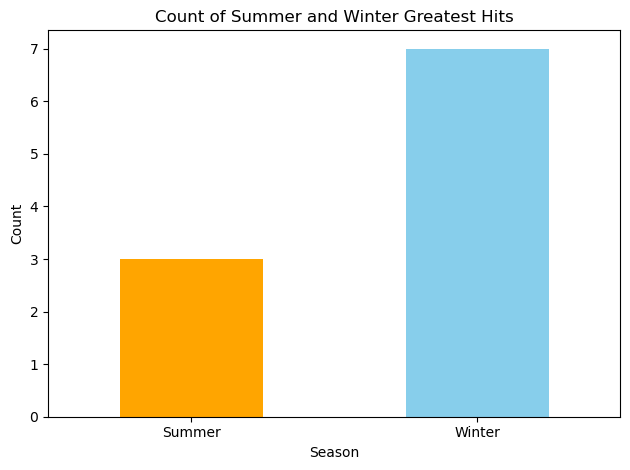

In [8]:
# Count occurrences of "Summer" and "Winter" in the "Seasons" column
season_counts = final_df['Season'].value_counts()

# Filter only "Summer" and "Winter" counts
filtered_counts = season_counts.loc[["Summer", "Winter"]]

# Plot the bar chart
filtered_counts.plot(kind='bar', color=['orange', 'skyblue'])

# Add labels and title
plt.ylabel('Count')
plt.xlabel('Season')
plt.title('Count of Summer and Winter Greatest Hits')
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.tight_layout()

plt.show()

In [9]:

# Filter the dataframe to include only "Winter" and "Summer"
filtered_df = final_df[final_df['Season'].isin(['Winter', 'Summer'])]

# Create a binary variable: 1 for "Winter", 0 for "Summer"
filtered_df['Season_Binary'] = filtered_df['Season'].map({'Winter': 1, 'Summer': 0})

# Define the dependent variable (Season_Binary)
y = filtered_df['Season_Binary']

# Add a constant (intercept term) for regression
X = sm.add_constant([1] * len(y))  # Equivalent to a t-test for the mean

# Fit the regression model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression
print(result.summary())

# Extract and interpret the p-value
print(f"P-value: {result.pvalues[0]}")

                            OLS Regression Results                            
Dep. Variable:          Season_Binary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Nov 2024   Prob (F-statistic):                nan
Time:                        19:38:51   Log-Likelihood:                -6.3861
No. Observations:                  10   AIC:                             14.77
Df Residuals:                       9   BIC:                             15.07
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7000      0.153      4.583      0.0

/var/folders/th/_xhg355d1tj4yxz7w8xvljcw0000gq/T/ipykernel_8350/1466359484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Season_Binary'] = filtered_df['Season'].map({'Winter': 1, 'Summer': 0})
/opt/anaconda3/envs/data_fa24/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/th/_xhg355d1tj4yxz7w8xvljcw0000gq/T/ipykernel_8350/1466359484.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-valu

## With the above done we can analyze the results!

<span style="color: red;">**First, I am aware of the warnings generating above. Since it does not have an impact on the regression being generated and displayed, It can be overlooked**</span>

As mentioned in some of the red text above, this all does not necessarily mean a lot. Since all of these songs are Greatest hits there is not a lot to compare together. Still, we can compare the results! First lets go through the bar chart, which provides the most information for us.

First off, My Hypothesis was wrong! Looks like the exact opposite happened, Winter was far more popular! However, this data does not really tell us much other than most of Queen's greatest releases were posted in Winter. Even with the song we had to throw out because it failed to provide more than a year for analysis, it still would not have swayed our count outcome.

As for the regression, it once again does not really say much. It does give us some values, but we do not have enough data or the correct data to compare together. Which leads me to alternative approaches


In terms of limitations, future directions, and alternative approaches, due to the scope of this project being a class project rather than a team of data scientists searching for an answer, I was certainly not going to find the answer here. If I was conducting this report for real, I would pull a bunch of data from random artists accross generations and both equal parts of their greatest hits and their normal songs. I theorize what I would find is more of a pattern of an upload schedule designed by record companies rather than data to support that what season you release a song impacts its success. I think this report is extremely limited due to such a small scope and only pulling Greatest Hits data with nothing to compare it to as a constant. In the future, I would follow the alternative approach outlined above in order to gain a better report for analysis.

I learned a lot about this hypothesis though! I was unaware Queen released so much material in the Winter. As one of my favorite bands I am glad to have a new fun fact to toss around! For the small scope of my hypothesis, I believe I not only answered but disproved it in the opposite direction!

# References
The only references utilized were ChatGpt. Specifically to create basic examples with sample dataframes (using 1,2,3 as column data) in order to understand how to structure some of the above inputs to work correctly. It was primarily used to Help with the format of the Seasons Function, as an example of how to make a bar chart using sample data, and an example of how to convert text data to numbers for the regression where I applied that style to the seasons. Thats all!